In [1]:
import os,sys
import numpy as np
from scipy import special as sp
import pylab as py

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-hoxnmo7r because the default path (/home/jovyan/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


We include 12 resonances, with the index order:

0) N(1440)1/2+

1) N(1520)3/2-

2) N(1535)1/2-

3) N(1650)1/2-

4) N(1675)5/2-

5) N(1680)5/2+

6) N(1710)1/2+

7) N(1720)3/2+

8) D(1232)3/2+

9) D(1620)1/2-

10) D(1700)3/2-

11) N'(1720)3/2+

Note that here the indices go from 0 to 11, instead of 1 to 12 as in fortran.

In [2]:
#Definition of numerical values

M       = 0.93827
MPI     = 0.135
META    = 0.547853
alpha   = 1./137.0366

'''
#Definition of resonance property arrays. In order:
masses, total widths, hadronic width parameter X, angular momentum, spin, parity,
branchings for single-pion decay, doubly-pion decay, and eta decay.
'''
Mres    = np.array([1.430,1.515,1.535,1.655,1.675,1.685,1.710,1.748,1.232,1.630,1.700,1.725])
Gres    = np.array([0.350,0.115,0.150,0.140,0.150,0.130,0.100,0.114,0.117,0.140,0.293,0.120])
Xbc     = np.array([0.3,0.1,0.5,0.5,0.5,0.2,0.5,0.5,0.5,0.5,0.22,0.5])
lres    = np.array([1,2,0,0,2,3,1,1,1,0,2,1])
jres    = np.array([0.5,1.5,0.5,0.5,2.5,2.5,0.5,1.5,1.5,0.5,1.5,1.5])
parres  = np.array([1,-1,-1,-1,-1,1,1,1,1,1,-1,1])
bpi     = np.array([0.65,0.6,0.45,0.6,0.4,0.68,0.13,0.14,1.,0.25,0.1,0.38])
bpipi   = np.array([0.35,0.4,0.13,0.22,0.6,0.32,0.57,0.82,0.,0.75,0.9,0.62])
beta    = np.array([0.0,0.0,0.42,0.18,0.0,0.0,0.30,0.04,0.0,0.0,0.0,0.0])

In [3]:
#3-momenta of pion, 2-pion and eta states for hadronic decay widths
ppires   = np.asarray(np.sqrt((Mres**2-(M+MPI)**2)*(Mres**2-(M-MPI)**2))/(2.*Mres))
ppipires = np.asarray(np.sqrt((Mres**2-(M+2.*MPI)**2)*(Mres**2-(M-2.*MPI)**2))/(2.*Mres))
petares=np.zeros(len(Mres))
for i in range(len(Mres)):
    if Mres[i]>M+META:
        petares[i]  = np.sqrt((Mres[i]**2-(M+META)**2)*(Mres[i]**2-(M-META)**2))/(2.*Mres[i])

In [4]:
# A12, A32 and S12 give the electrocoupling evolution with Q2. Note that here a dependence on W^2 is included as well for some of the resonances, due to the kinematic factors used for their experimental extraction

def A12(W2,Q2):
    a12=np.zeros(12)
    a12[0]=(-68.7866+21.3966*Q2+79.8415*np.sqrt(Q2))/(1.-0.7178*Q2**2+0.5663*Q2**2*np.sqrt(Q2))
    a12[1]=0.9*(-23.357-151.199533*Q2)/(1.+2.01489898*Q2**2-0.2654327*Q2**2*np.sqrt(Q2))
    a12[2]=(92.5029+1.45023*Q2)/(1.+0.1095*Q2**2-0.000322*Q2**2*np.sqrt(Q2))
    a12[3]=(47.4-19.6*(Q2+0.1))/(1.-1.46*(Q2+0.1)*np.sqrt(Q2+0.1)+1.17*(Q2+0.1)**3)
    a12[4]=(14.85-2.49*Q2)/(1. - 0.597*Q2*np.sqrt(Q2)+0.368*Q2**2)
    a12[5]=-20.*(1.+3.04*Q2+0.0305*Q2**2)/((1.+0.034*(Q2-2.)**2)*(1.+0.09*Q2**2)*(1.+0.765*Q2*np.sqrt(Q2)))
    a12[6]=(27.36)/(1.+0.77*Q2**(1.5))
    a12[7]=(90.)/(1.+3.16*(Q2+0.1)*np.sqrt(Q2+0.1))
    a12[8]=-(178.45)/((1.+Q2)*(1.+0.3457*Q2**2-0.087*Q2**3+0.00806*Q2**4))
    a12[9]=(47.2)/(1.+3.71*(Q2+0.1)*np.sqrt(Q2+0.1))
    a12[10]=(118.28)/(1.+0.72*(Q2+0.1)**2+3.26*(Q2+0.1)**2.5)
    if Q2+0.1 <= 2.:
        a12[11]=(36.5+1044.05*(Q2+0.1))/(1.+19.5*(Q2+0.1)*np.sqrt(Q2+0.1))
    elif Q2+0.1 <= 4.5:
        a12[11]=(36.5+1044.05*(Q2+0.1))/(1.+19.5*(Q2+0.1)*np.sqrt(Q2+0.1))*(1.-0.24*(Q2+0.1-2.))
    else:
        a12[11]=(36.5+1044.05*(Q2+0.1))/(1.+19.5*(Q2+0.1)*np.sqrt(Q2+0.1))*(0.4-0.24/5.*(Q2+0.1-4.5))
    a12=a12/1000.
    a12[7]=a12[7]*np.sqrt(qgam(W2,Q2)/Kcm(W2))
    a12[9]=a12[9]*np.sqrt(qgam(W2,Q2)/Kcm(W2))
    a12[10]=a12[10]*np.sqrt(qgam(W2,Q2)/Kcm(W2))
    a12[11]=a12[11]*np.sqrt(qgam(W2,Q2)/Kcm(W2))
    return np.asarray(a12)

def A32(W2,Q2):
    a32=np.zeros(12)
    a32[1]=0.9*(162.458285)/(1.+3.322979*Q2-2.0339966*Q2**2+1.622563*Q2**2*np.sqrt(Q2))
    a32[4]=(14.95-17.8*np.sqrt(Q2)+4.75*Q2)/(1.-0.78*Q2*np.sqrt(Q2)+0.405*Q2**2)
    a32[5]=(134.2)/(1.+4.83*Q2-2.68*Q2**2+1.1*Q2**2*np.sqrt(Q2))
    a32[7]=(-35.87-6.85*(Q2+0.1))/(1.+0.118*(Q2+0.1)**4)
    a32[8]=-(339.06)/((1.+Q2)*(1.+0.3481*Q2**2-0.0854*Q2**3 +0.00758*Q2**4))
    a32[10]=(101.)/(1.+16.6*(Q2+0.1)**2-5.0*(Q2+0.1)**2*np.sqrt(Q2+0.1))
    if Q2+0.1 <= 1.:
        a32[11]=(-37.9)/(1.+0.455)
    elif Q2+0.1 <= 2.:
        a32[11]=(-37.9)/(1.+0.455*(Q2+0.1)**2*np.sqrt(Q2+0.1))
    elif Q2+0.1 <= 4.5:
        a32[11]=(-37.9)/(1.+0.455*(Q2+0.1)**2*np.sqrt(Q2+0.1))*(1.-0.24*(Q2+0.1-2.))
    else:
        a32[11]=(-37.9)/(1.+0.455*(Q2+0.1)**2*np.sqrt(Q2+0.1))*(0.4-0.24/5.*(Q2+0.1-4.5))
    a32=a32/1000.
    a32[7]=a32[7]*np.sqrt(qgam(W2,Q2)/Kcm(W2))
    a32[9]=a32[9]*np.sqrt(qgam(W2,Q2)/Kcm(W2))
    a32[10]=a32[10]*np.sqrt(qgam(W2,Q2)/Kcm(W2))
    a32[11]=a32[11]*np.sqrt(qgam(W2,Q2)/Kcm(W2))
    return np.asarray(a32)

def S12(W2,Q2):
    s12=np.zeros(12)
    s12[0]=(31.19227+3.53338*Q2)/(1.-0.278265*Q2**2+0.3677575*Q2**2*np.sqrt(Q2))
    s12[1]=(-67.32)/(1.+1.73*Q2-2.8*Q2**2+2.91*Q2**2*np.sqrt(Q2))
    s12[2]=(-9.758811-4.231412*Q2)/(1.-0.7341952*Q2**2+0.5087887*Q2**2*np.sqrt(Q2))
    s12[3]=(-2.67)/(1.-2.82*(Q2+0.1)+2.*(Q2+0.1)*np.sqrt(Q2+0.1))
    s12[4]=(-213.-60.25*Q2)/(1.-16.376*Q2**2+68.87*Q2*np.sqrt(Q2))
    s12[5]=(-50.32)/(1.+2.55*Q2**4)
    s12[6]=(-7.25)/(1.+0.0733*Q2**(1.5))
    if Q2+0.1 < 0.95: 
        s12[7]=-23.1975-(-23.1975+32.)*(0.95-(Q2+0.1))/(0.95-0.65)
    else:
        s12[7]=(-3.09)/(1.-3.7*(Q2+0.1)+2.86*(Q2+0.1)*np.sqrt(Q2+0.1))
    s12[8]=(21.64-12.41*Q2+1.909*Q2**2)/(1.-0.4583*Q2+0.1422*Q2**2-0.0525*Q2**3+0.00931*Q2**4)
    s12[9]=-(25.0)/((Q2+0.1)*np.sqrt(Q2+0.1))
    s12[10]=(24.5)/(1.+0.15*(Q2+0.1)*np.sqrt(Q2+0.1))
    if Q2+0.1 <= 2.:
        s12[11]=(93.056)/(1.+1.61*(Q2+0.1)*np.sqrt(Q2+0.1))
    elif Q2+0.1 <= 4.5:
        s12[11]=(93.056)/(1.+1.61*(Q2+0.1)*np.sqrt(Q2+0.1))*(1.-0.24*(Q2+0.1-2.))
    else:
        s12[11]=(93.056)/(1.+1.61*(Q2+0.1)*np.sqrt(Q2+0.1))*(0.4-0.24/5.*(Q2+0.1-4.5))
    s12=s12/1000.*np.sqrt(2.)
    s12[7]=s12[7]*np.sqrt(qgam(W2,Q2)/Kcm(W2)/2.)
    s12[9]=s12[9]*np.sqrt(qgam(W2,Q2)/Kcm(W2)/2.)
    s12[10]=s12[10]*np.sqrt(qgam(W2,Q2)/Kcm(W2)/2.)
    s12[11]=s12[11]*np.sqrt(qgam(W2,Q2)/Kcm(W2)/2.)
    return np.asarray(s12)

In [6]:
#kinematic factors

def Kcm(W2):
    return (W2-M**2)/(2.*np.sqrt(W2))

def qgam(W2,Q2):
    egam=(W2-Q2-M**2)/(2.*np.sqrt(W2))
    return np.sqrt(egam**2+Q2)

def ppi(W2):
    if (W2<(M+MPI)**2):
        res=0.
    else:
        res=np.sqrt((W2-(M+MPI)**2)*(W2-(M-MPI)**2))/(2.*np.sqrt(W2))
    return res

def peta(W2):
    if (W2<(M+META)**2):
        res=0.
    else:
        res=np.sqrt((W2-(M+META)**2)*(W2-(M-META)**2))/(2.*np.sqrt(W2))
    return res

def ppipi(W2):
    if (W2<(M+2.*MPI)**2):
        res=0.
    else:
        res=np.sqrt((W2-(M+2.*MPI)**2)*(W2-(M-2.*MPI)**2))/(2.*np.sqrt(W2))
    return res

# virtual photon flux and transverse polarization functions
def eps(W2,Q2,Ebeam):
    nu=(W2-M**2+Q2)/(2.*M)
    sin2th=Q2/(4.*Ebeam*(Ebeam-nu))
    res=1./(1.+2.*(1.+nu**2/Q2)*sin2th/(1.-sin2th))
    return res

def gamv(W2,Q2,Ebeam):
    nu=(W2-M**2+Q2)/(2.*M)
    res=alpha/(4.*np.pi)*np.sqrt(W2)/(Ebeam*M)**2*(W2-M**2)/(Q2*(1.-eps(W2,Q2,Ebeam)))
    return res

In [9]:
#Here come the actual structure functions. They read in W^2 and Q^2 in GeV^2, and also a list of 12 flags of the type [1,0,0,0,1,0,...] that mark whether single resonances are turned on or off. If all should be on, pass the list where all flags are set to 1. Finally, the last argument turns on interference effects for interf=1 (coherent sum at amplitude level) or it's turned off for interf=0 (sum at cross-section level).

def get_F1(W2,Q2,flags,interf):
    gpi=np.asarray(Gres*(ppi(W2)/ppires)**(2.*lres+1.)*((ppires**2+Xbc**2)/(ppi(W2)**2+Xbc**2))**lres)
    b1jr=0.488866
    b1yr=-0.648204
    b1j=sp.jn(1,5.07614*ppi(W2))
    b1y=sp.yn(1,5.07614*ppi(W2))
    gpidel=Gres[8]*Mres[8]/np.sqrt(W2)*(b1jr**2+b1yr**2)/(b1j**2+b1y**2)
    gpi[8]=gpidel
    geta=np.zeros(len(Mres))
    for i in range(len(Mres)):
        if petares[i]!=0.:
            geta[i]=Gres[i]*(peta(W2)/petares[i])**(2.*lres[i]+1.)*((petares[i]**2+Xbc[i]**2)/(peta(W2)**2+Xbc[i]**2))**lres[i]
    gpipi=np.asarray(Gres*(ppipi(W2)/ppipires)**(2.*lres+4.)*((ppipires**2+Xbc**2)/(ppipi(W2)**2+Xbc**2))**(lres+2.))
    gtot=np.asarray(bpi*gpi+beta*geta+bpipi*gpipi)
    p1232=parres*(-1.)**(jres-0.5)
    coefs=np.sqrt((Mres**2-M**2)/Mres)/(2.*M)/np.sqrt(np.pi)*Mres*np.sqrt(gtot)/(Mres**2-W2-complex(0.,1.)*Mres*gtot)*qgam(Mres**2,Q2)/qgam(W2,Q2)*np.sqrt(2.*np.sqrt(W2)*M*(W2-M**2)/(2.*np.sqrt(W2)*np.pi*alpha*(Mres**2-M**2)))
    gpr=A12(W2,Q2)*coefs
    gmr=A32(W2,Q2)*coefs*p1232
    tempp=np.asarray(np.real(gpr*np.conj(gpr)))
    tempm=np.asarray(np.real(gmr*np.conj(gmr)))
    gprsqr=np.sum(tempp*flags)
    gmrsqr=np.sum(tempm*flags)
    if interf == 1.:
        gprsqr+=(gpr[0]*np.conj(gpr[6])+gpr[6]*np.conj(gpr[0]))*flags[0]*flags[6]
        gprsqr+=(gpr[2]*np.conj(gpr[3])+gpr[3]*np.conj(gpr[2]))*flags[2]*flags[3]
        gprsqr+=(gpr[7]*np.conj(gpr[11])+gpr[11]*np.conj(gpr[7]))/1.72*flags[7]*flags[11]
        gmrsqr+=(gmr[0]*np.conj(gmr[6])+gmr[6]*np.conj(gmr[0]))*flags[0]*flags[6]
        gmrsqr+=(gmr[2]*np.conj(gmr[3])+gmr[3]*np.conj(gmr[2]))*flags[2]*flags[3]
        gmrsqr+=(gmr[7]*np.conj(gmr[11])+gmr[11]*np.conj(gmr[7]))/1.72*flags[7]*flags[11]
    res=M**2*(gprsqr+gmrsqr)
    return np.real(res)

    
def get_F2(W2,Q2,flags,interf):
    nu=(W2-M**2+Q2)/(2.*M)
    gpi=np.asarray(Gres*(ppi(W2)/ppires)**(2.*lres+1.)*((ppires**2+Xbc**2)/(ppi(W2)**2+Xbc**2))**lres)
    b1jr=0.488866
    b1yr=-0.648204
    b1j=sp.jn(1,5.07614*ppi(W2))
    b1y=sp.yn(1,5.07614*ppi(W2))
    gpidel=Gres[8]*Mres[8]/np.sqrt(W2)*(b1jr**2+b1yr**2)/(b1j**2+b1y**2)
    gpi[8]=gpidel
    geta=np.zeros(len(Mres))
    for i in range(len(Mres)):
        if petares[i]!=0.:
            geta[i]=Gres[i]*(peta(W2)/petares[i])**(2.*lres[i]+1.)*((petares[i]**2+Xbc[i]**2)/(peta(W2)**2+Xbc[i]**2))**lres[i]
    gpipi=np.asarray(Gres*(ppipi(W2)/ppipires)**(2.*lres+4.)*((ppipires**2+Xbc**2)/(ppipi(W2)**2+Xbc**2))**(lres+2.))
    gtot=np.asarray(bpi*gpi+beta*geta+bpipi*gpipi)
    p1232=parres*(-1.)**(jres-0.5)
    coefs=np.sqrt((Mres**2-M**2)/Mres)/(2.*M)/np.sqrt(np.pi)*Mres*np.sqrt(gtot)/(Mres**2-W2-complex(0.,1.)*Mres*gtot)*qgam(Mres**2,Q2)/qgam(W2,Q2)*np.sqrt(2.*np.sqrt(W2)*M*(W2-M**2)/(2.*np.sqrt(W2)*np.pi*alpha*(Mres**2-M**2)))
    gpr=A12(W2,Q2)*coefs
    gmr=A32(W2,Q2)*coefs*p1232
    g0r=S12(W2,Q2)*coefs*p1232/np.sqrt(2.)
    tempp=np.asarray(np.real(gpr*np.conj(gpr)))
    tempm=np.asarray(np.real(gmr*np.conj(gmr)))
    temp0=np.asarray(np.real(g0r*np.conj(g0r)))
    gprsqr=np.sum(tempp*flags)
    gmrsqr=np.sum(tempm*flags)
    g0rsqr=np.sum(temp0*flags)
    if interf == 1.:
        gprsqr+=(gpr[0]*np.conj(gpr[6])+gpr[6]*np.conj(gpr[0]))*flags[0]*flags[6]
        gprsqr+=(gpr[2]*np.conj(gpr[3])+gpr[3]*np.conj(gpr[2]))*flags[2]*flags[3]
        gprsqr+=(gpr[7]*np.conj(gpr[11])+gpr[11]*np.conj(gpr[7]))/1.72*flags[7]*flags[11]
        gmrsqr+=(gmr[0]*np.conj(gmr[6])+gmr[6]*np.conj(gmr[0]))*flags[0]*flags[6]
        gmrsqr+=(gmr[2]*np.conj(gmr[3])+gmr[3]*np.conj(gmr[2]))*flags[2]*flags[3]
        gmrsqr+=(gmr[7]*np.conj(gmr[11])+gmr[11]*np.conj(gmr[7]))/1.72*flags[7]*flags[11]
        g0rsqr+=(g0r[0]*np.conj(g0r[6])+g0r[6]*np.conj(g0r[0]))*flags[0]*flags[6]
        g0rsqr+=(g0r[2]*np.conj(g0r[3])+g0r[3]*np.conj(g0r[2]))*flags[2]*flags[3]
        g0rsqr+=(g0r[7]*np.conj(g0r[11])+g0r[11]*np.conj(g0r[7]))/1.72*flags[7]*flags[11]
    res=M*nu/(1.+nu**2/Q2)*(gprsqr+gmrsqr+2.*g0rsqr)
    return np.real(res)

def get_g1(W2,Q2,flags,interf):
    nu=(W2-M**2+Q2)/(2.*M)
    gpi=np.asarray(Gres*(ppi(W2)/ppires)**(2.*lres+1.)*((ppires**2+Xbc**2)/(ppi(W2)**2+Xbc**2))**lres)
    b1jr=0.488866
    b1yr=-0.648204
    b1j=sp.jn(1,5.07614*ppi(W2))
    b1y=sp.yn(1,5.07614*ppi(W2))
    gpidel=Gres[8]*Mres[8]/np.sqrt(W2)*(b1jr**2+b1yr**2)/(b1j**2+b1y**2)
    gpi[8]=gpidel
    geta=np.zeros(len(Mres))
    for i in range(len(Mres)):
        if petares[i]!=0.:
            geta[i]=Gres[i]*(peta(W2)/petares[i])**(2.*lres[i]+1.)*((petares[i]**2+Xbc[i]**2)/(peta(W2)**2+Xbc[i]**2))**lres[i]
    gpipi=np.asarray(Gres*(ppipi(W2)/ppipires)**(2.*lres+4.)*((ppipires**2+Xbc**2)/(ppipi(W2)**2+Xbc**2))**(lres+2.))
    gtot=np.asarray(bpi*gpi+beta*geta+bpipi*gpipi)
    p1232=parres*(-1.)**(jres-0.5)
    coefs=np.sqrt((Mres**2-M**2)/Mres)/(2.*M)/np.sqrt(np.pi)*Mres*np.sqrt(gtot)/(Mres**2-W2-complex(0.,1.)*Mres*gtot)*qgam(Mres**2,Q2)/qgam(W2,Q2)*np.sqrt(2.*np.sqrt(W2)*M*(W2-M**2)/(2.*np.sqrt(W2)*np.pi*alpha*(Mres**2-M**2)))
    gpr=A12(W2,Q2)*coefs
    gmr=A32(W2,Q2)*coefs*p1232
    g0r=S12(W2,Q2)*coefs*p1232/np.sqrt(2.)
    tempp=np.asarray(np.real(gpr*np.conj(gpr)))
    tempm=np.asarray(np.real(gmr*np.conj(gmr)))
    temp0=np.asarray(np.real(g0r*np.conj(g0r)))
    tempp0=np.asarray(np.real(gpr*p1232*np.conj(g0r)))
    gprsqr=np.sum(tempp*flags)
    gmrsqr=np.sum(tempm*flags)
    g0rsqr=np.sum(temp0*flags)
    gp0rsqr=np.sum(tempp0*flags)
    if interf == 1.:
        gprsqr+=(gpr[0]*np.conj(gpr[6])+gpr[6]*np.conj(gpr[0]))*flags[0]*flags[6]
        gprsqr+=(gpr[2]*np.conj(gpr[3])+gpr[3]*np.conj(gpr[2]))*flags[2]*flags[3]
        gprsqr+=(gpr[7]*np.conj(gpr[11])+gpr[11]*np.conj(gpr[7]))/1.72*flags[7]*flags[11]
        gmrsqr+=(gmr[0]*np.conj(gmr[6])+gmr[6]*np.conj(gmr[0]))*flags[0]*flags[6]
        gmrsqr+=(gmr[2]*np.conj(gmr[3])+gmr[3]*np.conj(gmr[2]))*flags[2]*flags[3]
        gmrsqr+=(gmr[7]*np.conj(gmr[11])+gmr[11]*np.conj(gmr[7]))/1.72*flags[7]*flags[11]
        g0rsqr+=(g0r[0]*np.conj(g0r[6])+g0r[6]*np.conj(g0r[0]))*flags[0]*flags[6]
        g0rsqr+=(g0r[2]*np.conj(g0r[3])+g0r[3]*np.conj(g0r[2]))*flags[2]*flags[3]
        g0rsqr+=(g0r[7]*np.conj(g0r[11])+g0r[11]*np.conj(g0r[7]))/1.72*flags[7]*flags[11]
        gp0rsqr+=np.real(gpr[0]*p1232[0]*np.conj(g0r[6])+gpr[6]*p1232[6]*np.conj(g0r[0]))*flags[0]*flags[6]
        gp0rsqr+=np.real(gpr[2]*p1232[2]*np.conj(g0r[3])+gpr[3]*p1232[3]*np.conj(g0r[2]))*flags[2]*flags[3]
        gp0rsqr+=np.real(gpr[7]*p1232[7]*np.conj(g0r[11])+gpr[11]*p1232[11]*np.conj(g0r[7]))/1.72*flags[7]*flags[11]
    res=M**2/(1.+Q2/nu**2)*(gprsqr-gmrsqr+gp0rsqr*np.sqrt(2.*Q2)/nu)
    return np.real(res)
    
def get_g2(W2,Q2,flags,interf):
    nu=(W2-M**2+Q2)/(2.*M)
    gpi=np.asarray(Gres*(ppi(W2)/ppires)**(2.*lres+1.)*((ppires**2+Xbc**2)/(ppi(W2)**2+Xbc**2))**lres)
    b1jr=0.488866
    b1yr=-0.648204
    b1j=sp.jn(1,5.07614*ppi(W2))
    b1y=sp.yn(1,5.07614*ppi(W2))
    gpidel=Gres[8]*Mres[8]/np.sqrt(W2)*(b1jr**2+b1yr**2)/(b1j**2+b1y**2)
    gpi[8]=gpidel
    geta=np.zeros(len(Mres))
    for i in range(len(Mres)):
        if petares[i]!=0.:
            geta[i]=Gres[i]*(peta(W2)/petares[i])**(2.*lres[i]+1.)*((petares[i]**2+Xbc[i]**2)/(peta(W2)**2+Xbc[i]**2))**lres[i]
    gpipi=np.asarray(Gres*(ppipi(W2)/ppipires)**(2.*lres+4.)*((ppipires**2+Xbc**2)/(ppipi(W2)**2+Xbc**2))**(lres+2.))
    gtot=np.asarray(bpi*gpi+beta*geta+bpipi*gpipi)
    p1232=parres*(-1.)**(jres-0.5)
    coefs=np.sqrt((Mres**2-M**2)/Mres)/(2.*M)/np.sqrt(np.pi)*Mres*np.sqrt(gtot)/(Mres**2-W2-complex(0.,1.)*Mres*gtot)*qgam(Mres**2,Q2)/qgam(W2,Q2)*np.sqrt(2.*np.sqrt(W2)*M*(W2-M**2)/(2.*np.sqrt(W2)*np.pi*alpha*(Mres**2-M**2)))
    gpr=A12(W2,Q2)*coefs
    gmr=A32(W2,Q2)*coefs*p1232
    g0r=S12(W2,Q2)*coefs*p1232/np.sqrt(2.)
    tempp=np.asarray(np.real(gpr*np.conj(gpr)))
    tempm=np.asarray(np.real(gmr*np.conj(gmr)))
    temp0=np.asarray(np.real(g0r*np.conj(g0r)))
    tempp0=np.asarray(np.real(gpr*p1232*np.conj(g0r)))
    gprsqr=np.sum(tempp*flags)
    gmrsqr=np.sum(tempm*flags)
    g0rsqr=np.sum(temp0*flags)
    gp0rsqr=np.sum(tempp0*flags)
    if interf == 1.:
        gprsqr+=(gpr[0]*np.conj(gpr[6])+gpr[6]*np.conj(gpr[0]))*flags[0]*flags[6]
        gprsqr+=(gpr[2]*np.conj(gpr[3])+gpr[3]*np.conj(gpr[2]))*flags[2]*flags[3]
        gprsqr+=(gpr[7]*np.conj(gpr[11])+gpr[11]*np.conj(gpr[7]))/1.72*flags[7]*flags[11]
        gmrsqr+=(gmr[0]*np.conj(gmr[6])+gmr[6]*np.conj(gmr[0]))*flags[0]*flags[6]
        gmrsqr+=(gmr[2]*np.conj(gmr[3])+gmr[3]*np.conj(gmr[2]))*flags[2]*flags[3]
        gmrsqr+=(gmr[7]*np.conj(gmr[11])+gmr[11]*np.conj(gmr[7]))/1.72*flags[7]*flags[11]
        g0rsqr+=(g0r[0]*np.conj(g0r[6])+g0r[6]*np.conj(g0r[0]))*flags[0]*flags[6]
        g0rsqr+=(g0r[2]*np.conj(g0r[3])+g0r[3]*np.conj(g0r[2]))*flags[2]*flags[3]
        g0rsqr+=(g0r[7]*np.conj(g0r[11])+g0r[11]*np.conj(g0r[7]))/1.72*flags[7]*flags[11]
        gp0rsqr+=np.real(gpr[0]*p1232[0]*np.conj(g0r[6])+gpr[6]*p1232[6]*np.conj(g0r[0]))*flags[0]*flags[6]
        gp0rsqr+=np.real(gpr[2]*p1232[2]*np.conj(g0r[3])+gpr[3]*p1232[3]*np.conj(g0r[2]))*flags[2]*flags[3]
        gp0rsqr+=np.real(gpr[7]*p1232[7]*np.conj(g0r[11])+gpr[11]*p1232[11]*np.conj(g0r[7]))/1.72*flags[7]*flags[11]
    res=-M**2/(1.+Q2/nu**2)*(gprsqr-gmrsqr-gp0rsqr*np.sqrt(2./Q2)*nu)
    return np.real(res)

def get_FL(W2,Q2,flags,interf):
    nu=(W2-M**2+Q2)/(2.*M)
    xbj=Q2/(2.*M*nu)
    res=(1.+4.*M**2*xbj**2/Q2)*get_F2(W2,Q2,flags,interf)-2.*xbj*get_F1(W2,Q2,flags,interf)
    return res

def get_H12(W2,Q2,flags,interf):
    nu=(W2-M**2+Q2)/(2.*M)
    res=get_F1(W2,Q2,flags,interf)+get_g1(W2,Q2,flags,interf)-Q2/nu**2*get_g2(W2,Q2,flags,interf)
    return res

def get_H32(W2,Q2,flags,interf):
    nu=(W2-M**2+Q2)/(2.*M)
    res=get_F1(W2,Q2,flags,interf)-get_g1(W2,Q2,flags,interf)+Q2/nu**2*get_g2(W2,Q2,flags,interf)
    return res

def get_A1(W2,Q2,flags,interf):
    nu=(W2-M**2+Q2)/(2.*M)
    xbj=Q2/(2.*M*nu)
    res=(get_g1(W2,Q2,flags,interf)-4.*M**2*xbj**2/Q2*get_g2(W2,Q2,flags,interf))/get_F1(W2,Q2,flags,interf)
    return res

def get_A2(W2,Q2,flags,interf):
    nu=(W2-M**2+Q2)/(2.*M)
    res=np.sqrt(Q2)/nu*(get_g1(W2,Q2,flags,interf)+get_g2(W2,Q2,flags,interf))/get_F1(W2,Q2,flags,interf)
    return res

def get_sigT(W2,Q2,flags,interf):
    nu=(W2-M**2+Q2)/(2.*M)
    res=8.*np.pi**2*alpha/(W2-M**2)*get_F1(W2,Q2,flags,interf)*389.379
    return res

def get_sigL(W2,Q2,flags,interf):
    nu=(W2-M**2+Q2)/(2.*M)
    xbj=Q2/(2.*M*nu)
    res=8.*np.pi**2*alpha/(W2-M**2)*((1.+Q2/nu**2)/(2.*xbj)*get_F2(W2,Q2,flags,interf)-get_F1(W2,Q2,flags,interf))*389.379
    return res

def get_dXS(W2,Q2,Ebeam,flags,interf):
    res=1000.*(get_sigT(W2,Q2,flags,interf)+eps(W2,Q2,Ebeam)*get_sigL(W2,Q2,flags,interf))*gamv(W2,Q2,Ebeam)
    return res

In [12]:
Q2user=2.
Wuser=1.5
Ebuser=10.6
interf=1
resar=[1,1,1,1,1,1,1,1,1,1,1,1]

print('F1 = %.5f'%get_F1(Wuser**2,Q2user,resar,interf))
print('F2 = %.5f'%get_F2(Wuser**2,Q2user,resar,interf))
print('FL = %.5f'%get_FL(Wuser**2,Q2user,resar,interf))
print('g1 = %.5f'%get_g1(Wuser**2,Q2user,resar,interf))
print('g2 = %.5f'%get_g2(Wuser**2,Q2user,resar,interf))
print('H1/2 = %.5f'%get_H12(Wuser**2,Q2user,resar,interf))
print('H3/2 = %.5f'%get_H32(Wuser**2,Q2user,resar,interf))
print('A1 = %.5f'%get_A1(Wuser**2,Q2user,resar,interf))
print('A2 = %.5f'%get_A2(Wuser**2,Q2user,resar,interf))
print('sigT [mub] = %.5f'%get_sigT(Wuser**2,Q2user,resar,interf))
print('sigL [mub] = %.5f'%get_sigL(Wuser**2,Q2user,resar,interf))
print('dsig/(dQ2dW) [nb/GeV^3] = %.5f'%get_dXS(Wuser**2,Q2user,Ebuser,resar,interf))

F1 = 0.17031
F2 = 0.14405
FL = 0.03124
g1 = 0.07773
g2 = -0.09524
H1/2 = 0.30711
H3/2 = 0.03351
A1 = 0.80326
A2 = -0.08101
sigT [mub] = 27.89620
sigL [mub] = 4.31050
dsig/(dQ2dW) [nb/GeV^3] = 7.07003


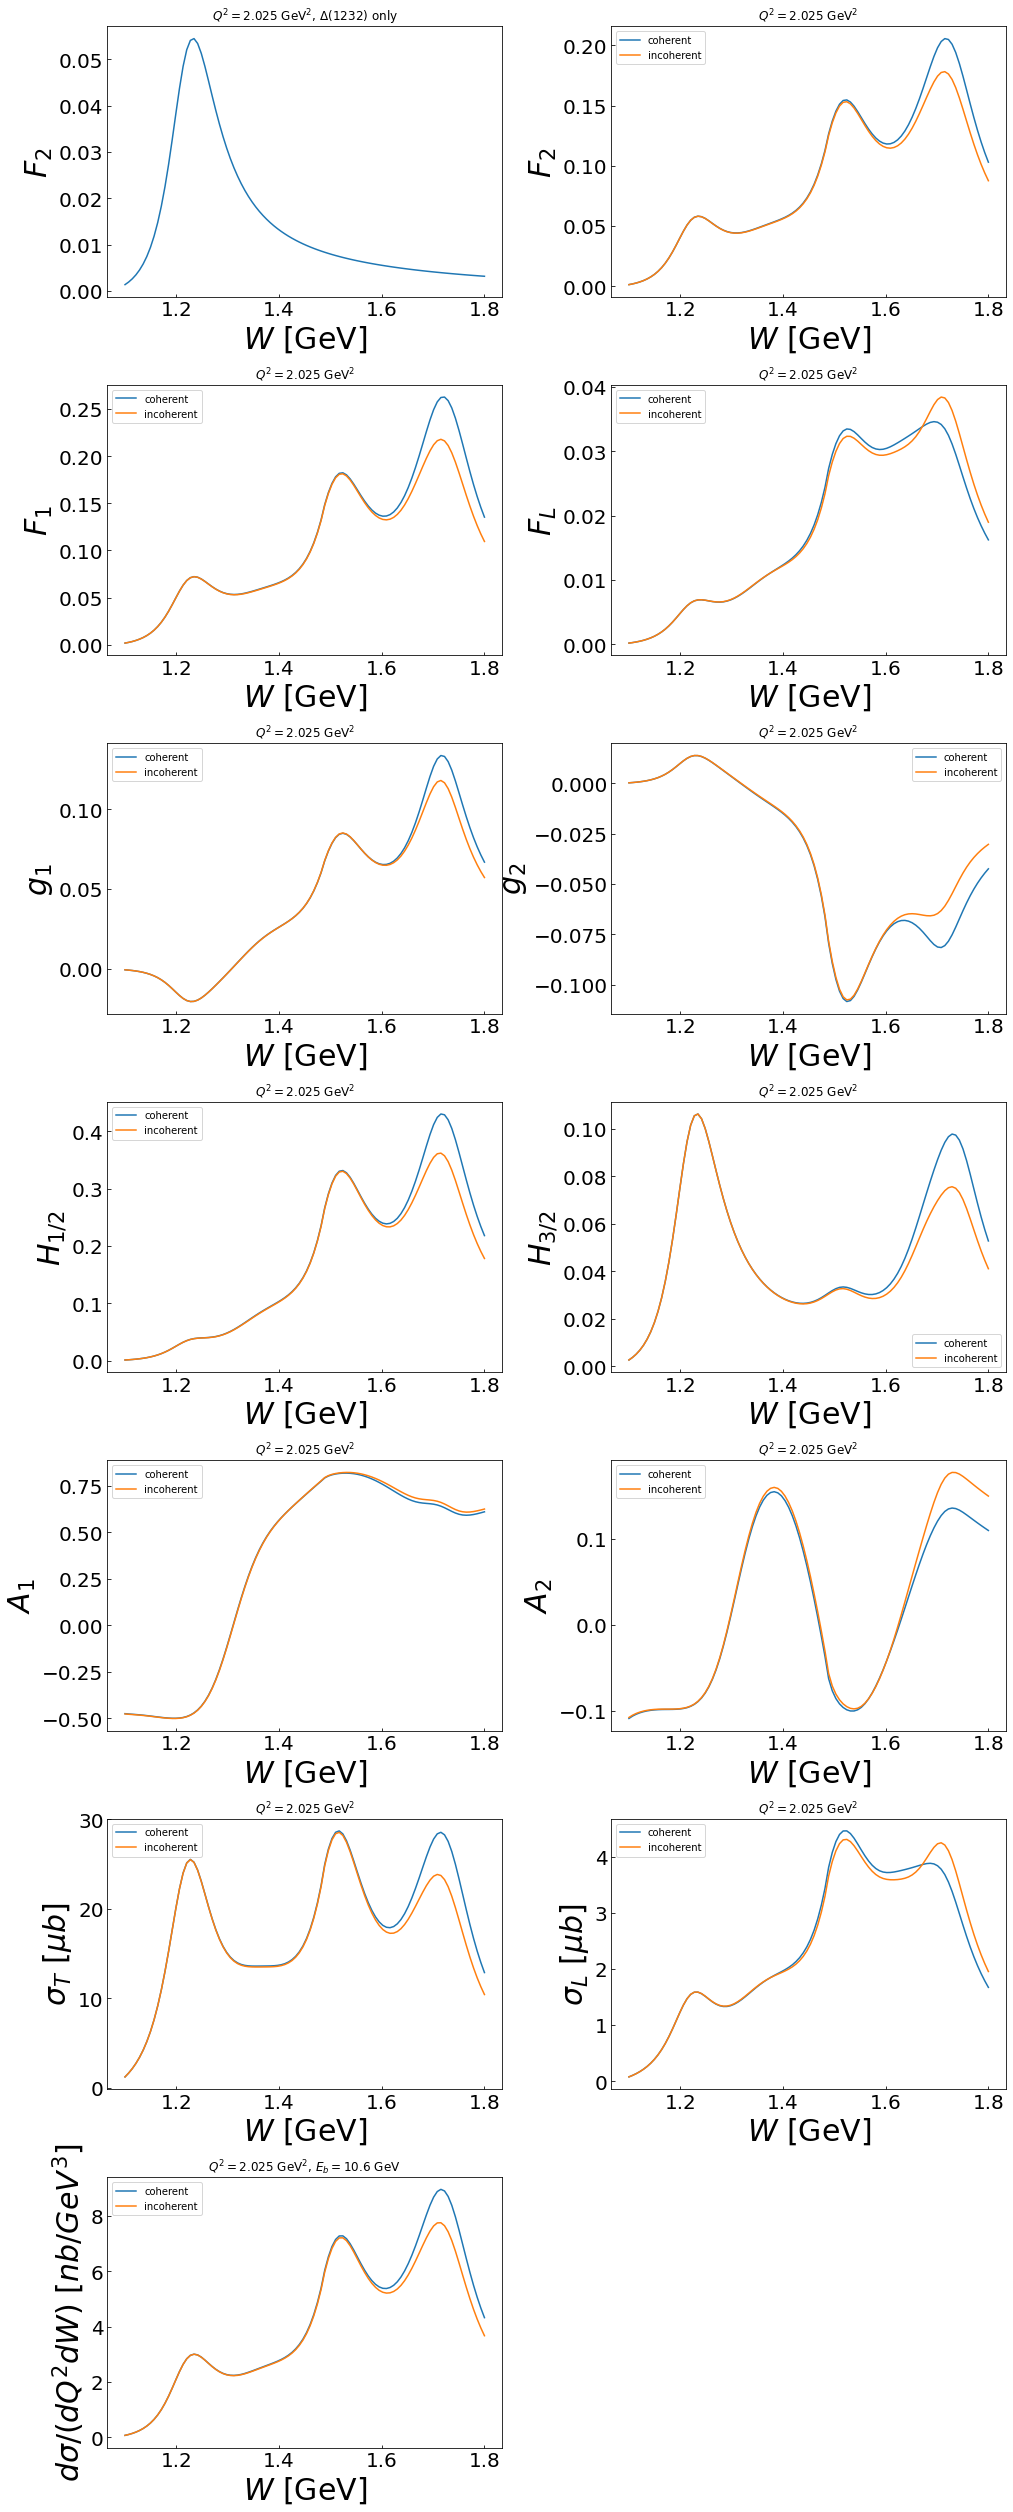

In [16]:
'''
The following plots some examples.
'''
nrows,ncols=7,2
fig = py.figure(figsize=(ncols*7,nrows*5))
    
W=np.linspace(1.1,1.8,100)
Q2=2.025
Ebeam=10.6

ax=py.subplot(nrows,ncols,1)
F2=[get_F2(_**2,Q2,[0,0,0,0,0,0,0,0,1,0,0,0],1.) for _ in W]
ax.plot(W,F2)
ax.tick_params(axis='both', which='major', labelsize=20,direction='in')
ax.set_ylabel(r'$F_2$',size=30)
ax.set_xlabel(r'$W$ [GeV]',size=30)
ax.set_title(r'$Q^2=2.025$ GeV$^2$, $\Delta(1232)$ only')
    
ax=py.subplot(nrows,ncols,2)
coher=[get_F2(_**2,Q2,[1,1,1,1,1,1,1,1,1,1,1,1],1.) for _ in W]
incoh=[get_F2(_**2,Q2,[1,1,1,1,1,1,1,1,1,1,1,1],0.) for _ in W]
ax.plot(W,coher,label='coherent')
ax.plot(W,incoh,label='incoherent')
ax.tick_params(axis='both', which='major', labelsize=20,direction='in')
ax.set_ylabel(r'$F_2$',size=30)
ax.set_xlabel(r'$W$ [GeV]',size=30)
ax.set_title(r'$Q^2=2.025$ GeV$^2$')
ax.legend()
    
ax=py.subplot(nrows,ncols,3)
coher=[get_F1(_**2,Q2,[1,1,1,1,1,1,1,1,1,1,1,1],1.) for _ in W]
incoh=[get_F1(_**2,Q2,[1,1,1,1,1,1,1,1,1,1,1,1],0.) for _ in W]
ax.plot(W,coher,label='coherent')
ax.plot(W,incoh,label='incoherent')
ax.tick_params(axis='both', which='major', labelsize=20,direction='in')
ax.set_ylabel(r'$F_1$',size=30)
ax.set_xlabel(r'$W$ [GeV]',size=30)
ax.set_title(r'$Q^2=2.025$ GeV$^2$')
ax.legend()
    
ax=py.subplot(nrows,ncols,4)
coher=[get_FL(_**2,Q2,[1,1,1,1,1,1,1,1,1,1,1,1],1.) for _ in W]
incoh=[get_FL(_**2,Q2,[1,1,1,1,1,1,1,1,1,1,1,1],0.) for _ in W]
ax.plot(W,coher,label='coherent')
ax.plot(W,incoh,label='incoherent')
ax.tick_params(axis='both', which='major', labelsize=20,direction='in')
ax.set_ylabel(r'$F_L$',size=30)
ax.set_xlabel(r'$W$ [GeV]',size=30)
ax.set_title(r'$Q^2=2.025$ GeV$^2$')
ax.legend()
    
ax=py.subplot(nrows,ncols,5)
coher=[get_g1(_**2,Q2,[1,1,1,1,1,1,1,1,1,1,1,1],1.) for _ in W]
incoh=[get_g1(_**2,Q2,[1,1,1,1,1,1,1,1,1,1,1,1],0.) for _ in W]
ax.plot(W,coher,label='coherent')
ax.plot(W,incoh,label='incoherent')
ax.tick_params(axis='both', which='major', labelsize=20,direction='in')
ax.set_ylabel(r'$g_1$',size=30)
ax.set_xlabel(r'$W$ [GeV]',size=30)
ax.set_title(r'$Q^2=2.025$ GeV$^2$')
ax.legend()
    
ax=py.subplot(nrows,ncols,6)
coher=[get_g2(_**2,Q2,[1,1,1,1,1,1,1,1,1,1,1,1],1.) for _ in W]
incoh=[get_g2(_**2,Q2,[1,1,1,1,1,1,1,1,1,1,1,1],0.) for _ in W]
ax.plot(W,coher,label='coherent')
ax.plot(W,incoh,label='incoherent')
ax.tick_params(axis='both', which='major', labelsize=20,direction='in')
ax.set_ylabel(r'$g_2$',size=30)
ax.set_xlabel(r'$W$ [GeV]',size=30)
ax.set_title(r'$Q^2=2.025$ GeV$^2$')
ax.legend()
    
ax=py.subplot(nrows,ncols,7)
coher=[get_H12(_**2,Q2,[1,1,1,1,1,1,1,1,1,1,1,1],1.) for _ in W]
incoh=[get_H12(_**2,Q2,[1,1,1,1,1,1,1,1,1,1,1,1],0.) for _ in W]
ax.plot(W,coher,label='coherent')
ax.plot(W,incoh,label='incoherent')
ax.tick_params(axis='both', which='major', labelsize=20,direction='in')
ax.set_ylabel(r'$H_{1/2}$',size=30)
ax.set_xlabel(r'$W$ [GeV]',size=30)
ax.set_title(r'$Q^2=2.025$ GeV$^2$')
ax.legend()
    
ax=py.subplot(nrows,ncols,8)
coher=[get_H32(_**2,Q2,[1,1,1,1,1,1,1,1,1,1,1,1],1.) for _ in W]
incoh=[get_H32(_**2,Q2,[1,1,1,1,1,1,1,1,1,1,1,1],0.) for _ in W]
ax.plot(W,coher,label='coherent')
ax.plot(W,incoh,label='incoherent')
ax.tick_params(axis='both', which='major', labelsize=20,direction='in')
ax.set_ylabel(r'$H_{3/2}$',size=30)
ax.set_xlabel(r'$W$ [GeV]',size=30)
ax.set_title(r'$Q^2=2.025$ GeV$^2$')
ax.legend()
    
ax=py.subplot(nrows,ncols,9)
coher=[get_A1(_**2,Q2,[1,1,1,1,1,1,1,1,1,1,1,1],1.) for _ in W]
incoh=[get_A1(_**2,Q2,[1,1,1,1,1,1,1,1,1,1,1,1],0.) for _ in W]
ax.plot(W,coher,label='coherent')
ax.plot(W,incoh,label='incoherent')
ax.tick_params(axis='both', which='major', labelsize=20,direction='in')
ax.set_ylabel(r'$A_1$',size=30)
ax.set_xlabel(r'$W$ [GeV]',size=30)
ax.set_title(r'$Q^2=2.025$ GeV$^2$')
ax.legend()
    
ax=py.subplot(nrows,ncols,10)
coher=[get_A2(_**2,Q2,[1,1,1,1,1,1,1,1,1,1,1,1],1.) for _ in W]
incoh=[get_A2(_**2,Q2,[1,1,1,1,1,1,1,1,1,1,1,1],0.) for _ in W]
ax.plot(W,coher,label='coherent')
ax.plot(W,incoh,label='incoherent')
ax.tick_params(axis='both', which='major', labelsize=20,direction='in')
ax.set_ylabel(r'$A_2$',size=30)
ax.set_xlabel(r'$W$ [GeV]',size=30)
ax.set_title(r'$Q^2=2.025$ GeV$^2$')
ax.legend()
    
ax=py.subplot(nrows,ncols,11)
coher=[get_sigT(_**2,Q2,[1,1,1,1,1,1,1,1,1,1,1,1],1.) for _ in W]
incoh=[get_sigT(_**2,Q2,[1,1,1,1,1,1,1,1,1,1,1,1],0.) for _ in W]
ax.plot(W,coher,label='coherent')
ax.plot(W,incoh,label='incoherent')
ax.tick_params(axis='both', which='major', labelsize=20,direction='in')
ax.set_ylabel(r'$\sigma_T~[\mu b]$',size=30)
ax.set_xlabel(r'$W$ [GeV]',size=30)
ax.set_title(r'$Q^2=2.025$ GeV$^2$')
ax.legend()
    
ax=py.subplot(nrows,ncols,12)
coher=[get_sigL(_**2,Q2,[1,1,1,1,1,1,1,1,1,1,1,1],1.) for _ in W]
incoh=[get_sigL(_**2,Q2,[1,1,1,1,1,1,1,1,1,1,1,1],0.) for _ in W]
ax.plot(W,coher,label='coherent')
ax.plot(W,incoh,label='incoherent')
ax.tick_params(axis='both', which='major', labelsize=20,direction='in')
ax.set_ylabel(r'$\sigma_L~[\mu b]$',size=30)
ax.set_xlabel(r'$W$ [GeV]',size=30)
ax.set_title(r'$Q^2=2.025$ GeV$^2$')
ax.legend()
    
ax=py.subplot(nrows,ncols,13)
coher=[get_dXS(_**2,Q2,Ebeam,[1,1,1,1,1,1,1,1,1,1,1,1],1.) for _ in W]
incoh=[get_dXS(_**2,Q2,Ebeam,[1,1,1,1,1,1,1,1,1,1,1,1],0.) for _ in W]
ax.plot(W,coher,label='coherent')
ax.plot(W,incoh,label='incoherent')
ax.tick_params(axis='both', which='major', labelsize=20,direction='in')
ax.set_ylabel(r'$d\sigma/(dQ^2dW)~[nb/GeV^3]$',size=30)
ax.set_xlabel(r'$W$ [GeV]',size=30)
ax.set_title(r'$Q^2=2.025$ GeV$^2$, $E_b=10.6$ GeV')
ax.legend()
    
py.tight_layout()